Dataset link : https://www.kaggle.com/datasets/prathamtripathi/drug-classification Do visualization and analysis to understand the dataset (follow kaggle code for inspiration) Apply Random Forest Plot AUC-ROC curve *

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/drug200.csv')

In [34]:
# Check the data types, dimensions, and summary statistics
print(df.dtypes)
print(df.shape)
print(df.describe())

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object
(200, 6)
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
0


<AxesSubplot:>

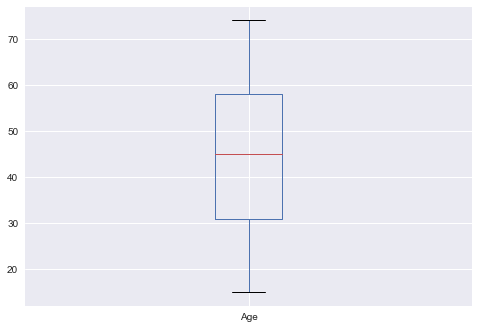

In [35]:
# Check for missing values, duplicate records, and outliers
print(df.isnull().sum())
print(df.duplicated().sum())
df.boxplot(column=['Age'])

**There is no Null Value  in the Data Set**

In [36]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# EDA for this dataset

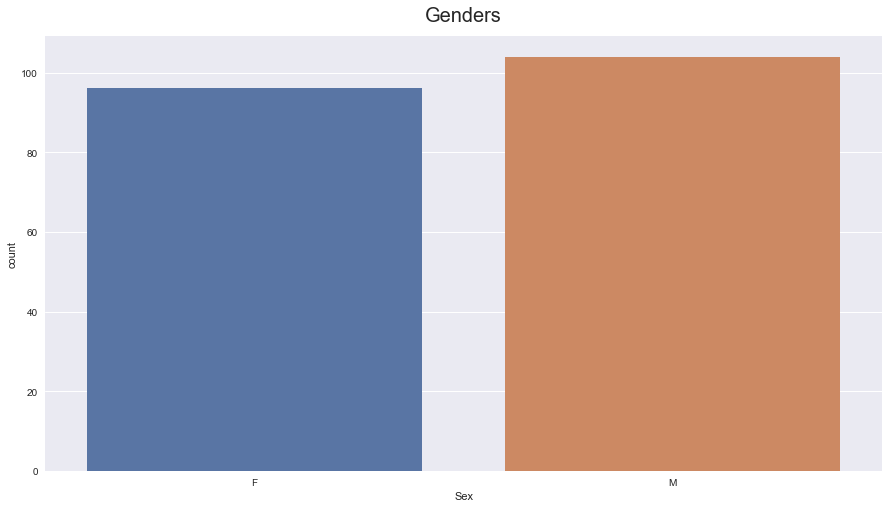

In [37]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))
plt.title("Genders", fontsize=20, y=1.02)
sns.countplot(x = df.Sex, palette="deep")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


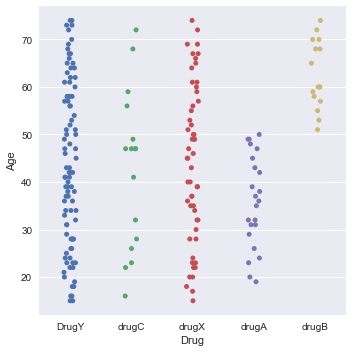

In [38]:
sns.catplot('Drug', 'Age', data = df)

**DrugY is most used for all ages.
DrugC frequency is low and is used for all ages.
DrugX is second highest frequency and is used for all ages.
Drug A appears only for people age 50 or lower.
Drug B appears only for people age 50 or higher.***
- Now checking whethere there is relation between Geneder and Drug

In [39]:
sex_drug = df.groupby('Sex').Drug.value_counts()
sex_drug

Sex  Drug 
F    DrugY    47
     drugX    27
     drugA     9
     drugC     7
     drugB     6
M    DrugY    44
     drugX    27
     drugA    14
     drugB    10
     drugC     9
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug'>

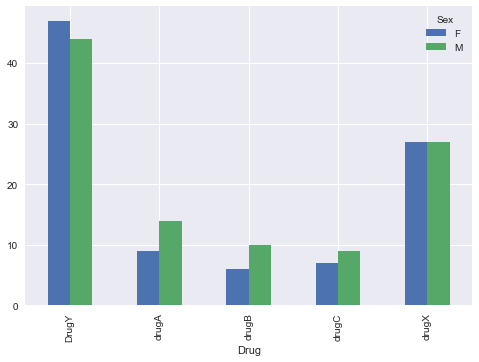

In [40]:
sex_drug.unstack(level=0).plot(kind='bar', subplots=False)

**Gender of patients is not correlated with their drug type.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


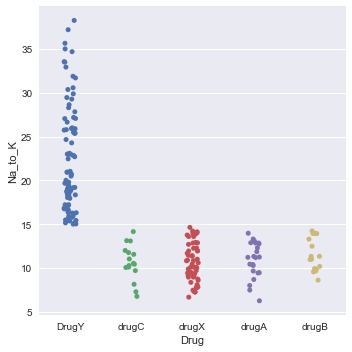

In [41]:
sns.catplot('Drug', 'Na_to_K', data=df)

**For na_to_k higher than 15, only drugY is used.
Rest drugs are used in 5 to 15 Na_to_k value range.**
- Now Checking the outliers

<AxesSubplot:xlabel='Age'>

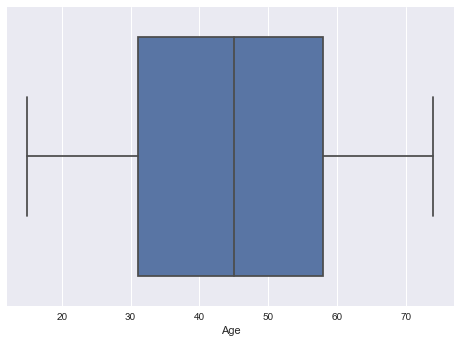

In [42]:
sns.boxplot(x=df['Age'])

**No outliers in gender**

<AxesSubplot:ylabel='Na_to_K'>

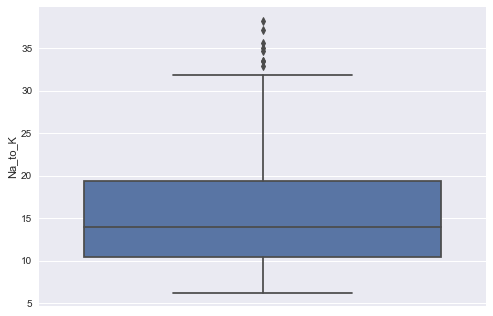

In [43]:
sns.boxplot(y=df['Na_to_K'])

In [44]:
df.drop(df[df.Na_to_K > 30].index, inplace=True)

<AxesSubplot:xlabel='Na_to_K'>

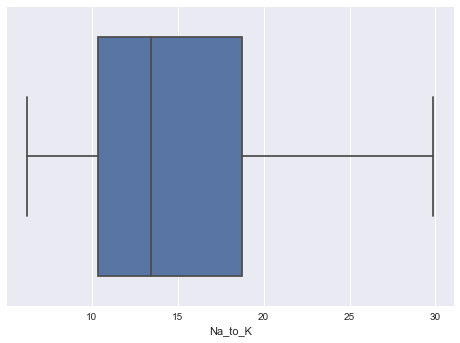

In [45]:
sns.boxplot(x=df['Na_to_K'])

In [46]:
df["Sex"] = df["Sex"].map({"M": 0, "F":1})
df["BP"] = df["BP"].map({"HIGH" : 3, "NORMAL" : 2, "LOW": 1})
df["Cholesterol"] = df["Cholesterol"].map({"HIGH": 1, "NORMAL" : 0})
df["Drug"] = df["Drug"].map({"DrugY": 0, "drugC": 1, "drugX": 2, "drugA":3, "drugB":4})

<AxesSubplot:>

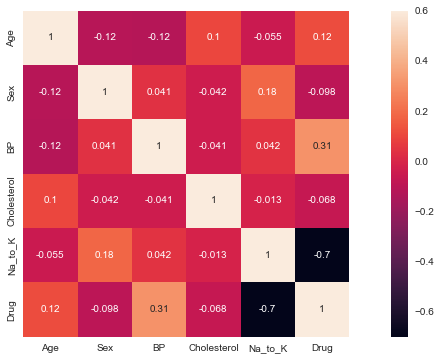

In [47]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

- BP is positively correlated with Drug type.
- Na_to_K is highly negatively correlated with drug type.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


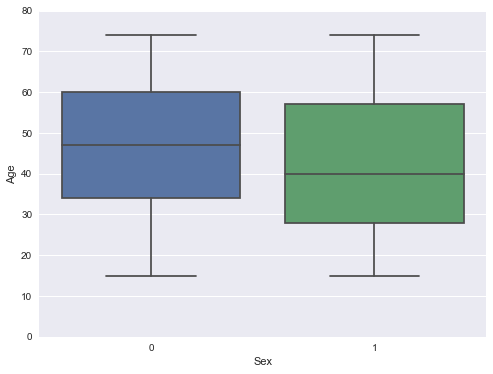

In [48]:
plt.figure(figsize = (8,6))
ax = sns.boxplot('Sex', 'Age', data = df).set(ylim = (0, 80))

**Distribution of patients age compared to gender is pretty simillar.**

# Feature Engineering
- Drop of column Sex, since in EDA we saw it didin't had any affect on target feature.

In [51]:
#ML Algorithms 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [32]:
df.drop('Sex', axis=1, inplace=True)

KeyError: "['Sex'] not found in axis"

**Data split**

In [54]:
#Data split
from sklearn.model_selection import train_test_split

In [55]:
values=df.values
X, y = values[:, :-1], values[:, -1]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

In [65]:
y

array([0., 1., 1., 2., 0., 2., 0., 1., 0., 0., 1., 0., 0., 0., 2., 0., 2.,
       3., 1., 0., 0., 0., 0., 0., 2., 0., 0., 2., 4., 2., 2., 2., 3., 2.,
       2., 2., 0., 4., 0., 2., 2., 2., 3., 1., 0., 0., 2., 0., 0., 4., 1.,
       4., 0., 2., 0., 0., 3., 0., 2., 4., 0., 3., 2., 0., 0., 4., 0., 2.,
       0., 0., 0., 3., 0., 3., 2., 4., 2., 1., 3., 1., 4., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 3., 3., 1., 2., 0., 2., 2., 0., 4.,
       0., 3., 2., 2., 2., 2., 0., 2., 2., 3., 0., 0., 0., 0., 0., 4., 0.,
       0., 2., 2., 0., 2., 0., 0., 2., 4., 3., 4., 2., 3., 0., 4., 0., 3.,
       2., 2., 3., 2., 1., 3., 4., 2., 2., 0., 1., 3., 0., 1., 2., 2., 4.,
       2., 0., 0., 0., 0., 2., 0., 3., 2., 2., 0., 0., 3., 0., 3., 0., 0.,
       0., 0., 2., 2., 0., 0., 4., 3., 0., 0., 3., 0., 1., 1., 1., 2., 2.,
       2.])

In [56]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (131, 5)
X_test shape: (57, 5)
y_train shape: (131,)
y_test shape: (57,)


In [57]:
rfc = RandomForestClassifier(n_estimators = 9, criterion = 'entropy', random_state=22)

rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=9, random_state=22)

In [60]:
#Model evaluation metrics
from sklearn import metrics
rf_pred = rfc.predict(X_test)

In [66]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as pyplot

# predict probabilities
yhat = rfc.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

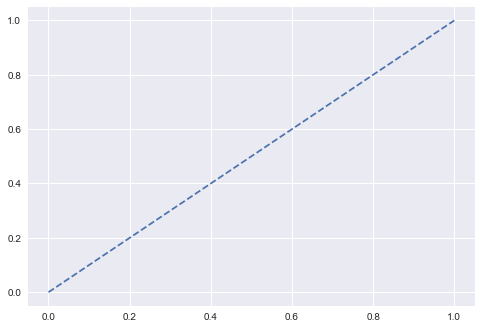

In [68]:

# plot no skill/RANDOM roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--')

In [69]:
# calculate roc curve for model
fpr, tpr, thresholds = roc_curve(y_test, pos_probs)

ValueError: multiclass format is not supported

In [79]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  df[column_name] = label_encoder.fit_transform(df[column_name]) 

In [81]:
classes = label_encoder.classes_

NameError: name 'label_encoder' is not defined

In [82]:
from sklearn.preprocessing import label_binarize


y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# ROC Curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

NameError: name 'classes' is not defined

In [70]:
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("Receiver operating characteristic example")

# show the plot
pyplot.show()
print(thresholds)
print(tpr)

NameError: name 'fpr' is not defined

In [61]:
print("Accuracy score : ", metrics.accuracy_score(y_test, rf_pred))

print("F1 score: ", metrics.f1_score(y_test, rf_pred, average='weighted') )

print("Jaccard score: ", metrics.jaccard_score(y_test, rf_pred, average='weighted'))

print("recall score: ", metrics.recall_score(y_test, rf_pred, average='weighted'))

print("precision score: ", metrics.precision_score(y_test, rf_pred, average='weighted'))

Accuracy score :  0.9824561403508771
F1 score:  0.9816764132553606
Jaccard score:  0.968421052631579
recall score:  0.9824561403508771
precision score:  0.9859649122807018


<AxesSubplot:>

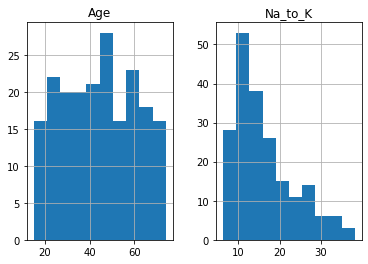

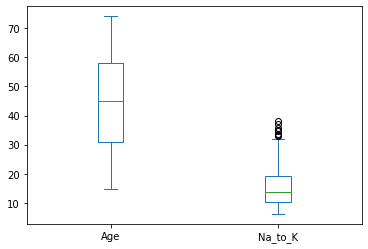

In [6]:
# Visualize the data using histograms, box plots, and scatter plots
df.hist()
df.plot(kind='box')

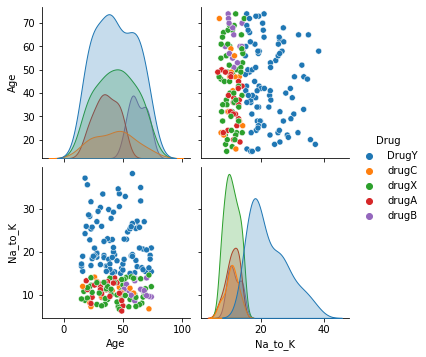

In [12]:
import seaborn as sns

# Create a pair plot to visualize the relationships between variables
sns.pairplot(df, hue='Drug')

<AxesSubplot:xlabel='Drug', ylabel='count'>

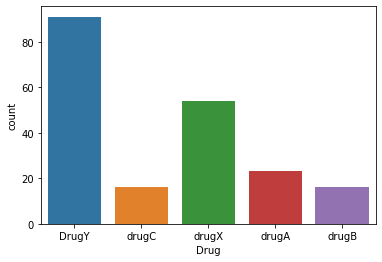

In [13]:
# Create a count plot to show the distribution of drug types
sns.countplot(x='Drug', data=df)


<AxesSubplot:xlabel='Drug', ylabel='Age'>

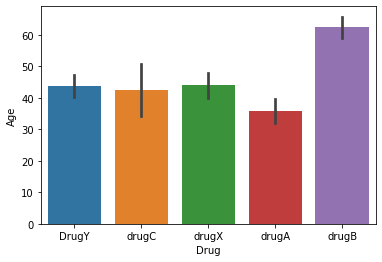

In [14]:
# Create a bar plot to show the average age by drug type
sns.barplot(x='Drug', y='Age', data=df)


<AxesSubplot:xlabel='BP', ylabel='Na_to_K'>

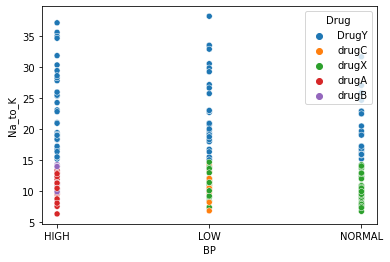

In [23]:
sns.scatterplot(x='BP', y='Na_to_K', data=df, hue='Drug')

In [24]:
data=df.copy()

<AxesSubplot:xlabel='Age', ylabel='count'>

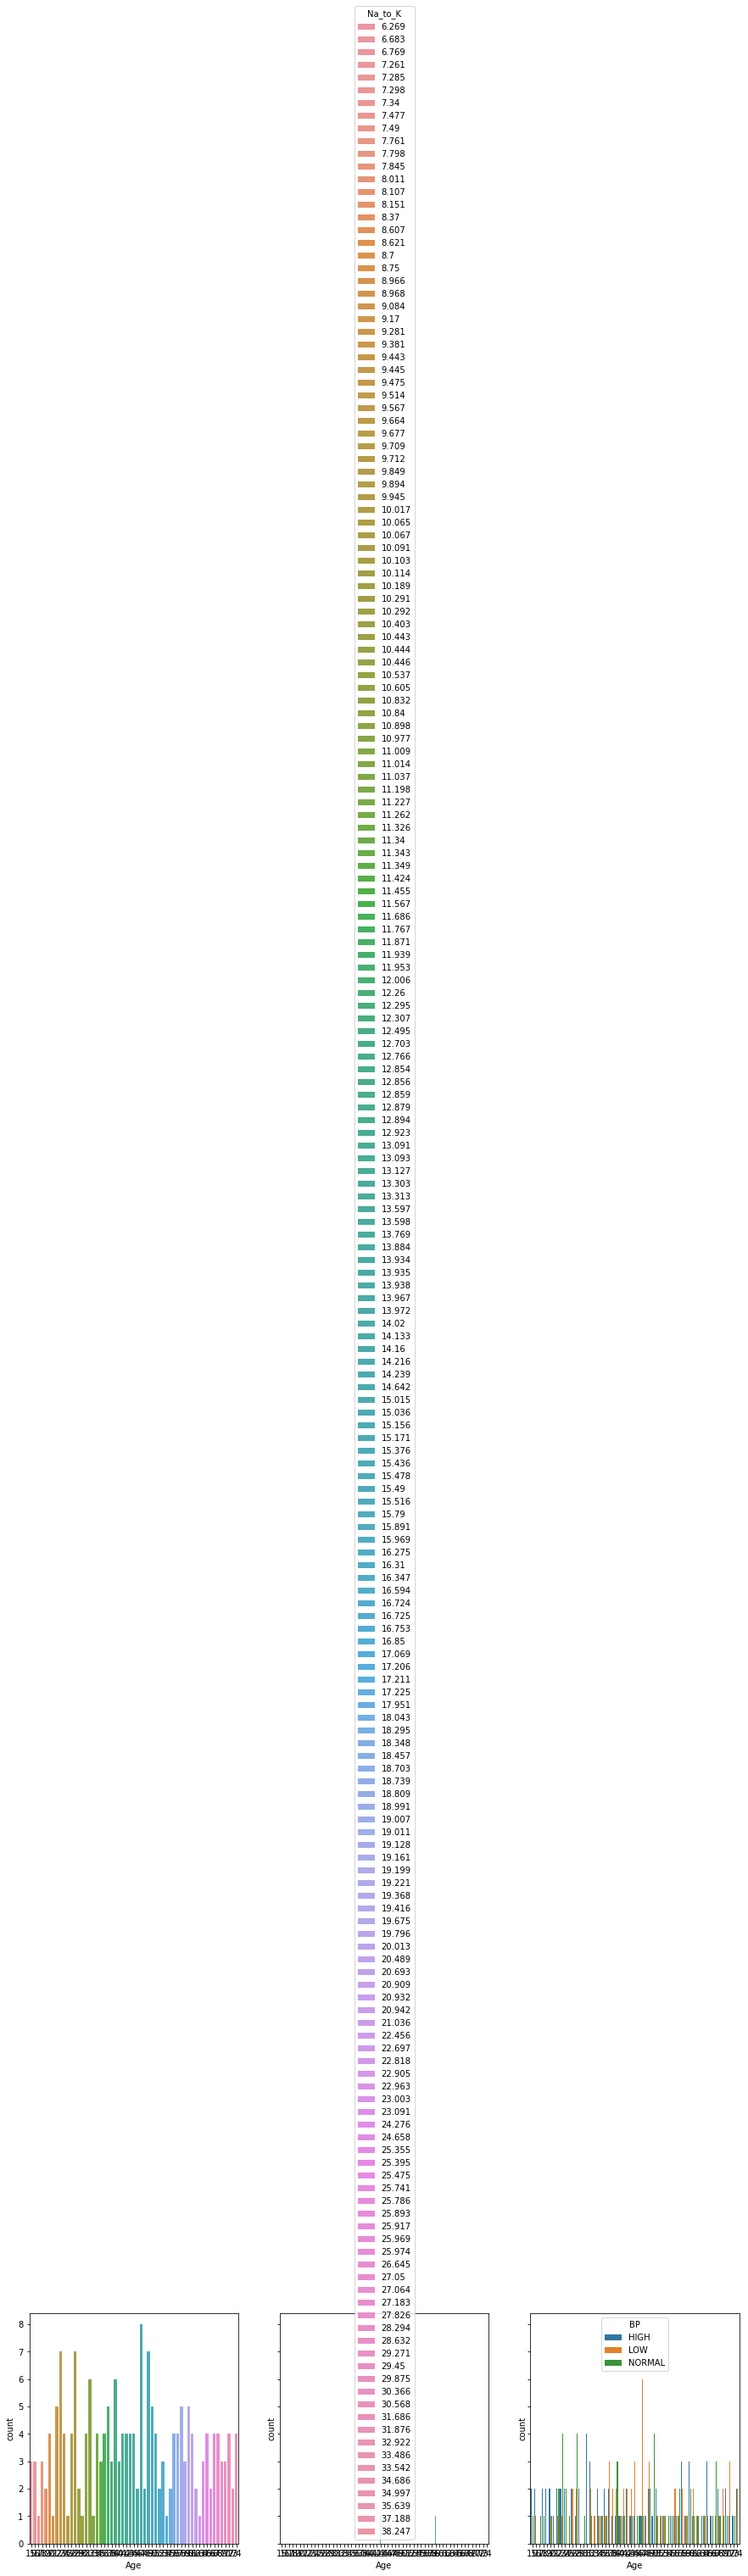

In [26]:
ig, ax = plt.subplots(1,3, sharey=True, figsize=(15,5))
sns.countplot(x='Age', data=data, ax=ax[0])
sns.countplot(x='Age',hue='Na_to_K', data=data, ax=ax[1])
sns.countplot(x='Age',hue='BP', data=data, ax=ax[2])

<AxesSubplot:>

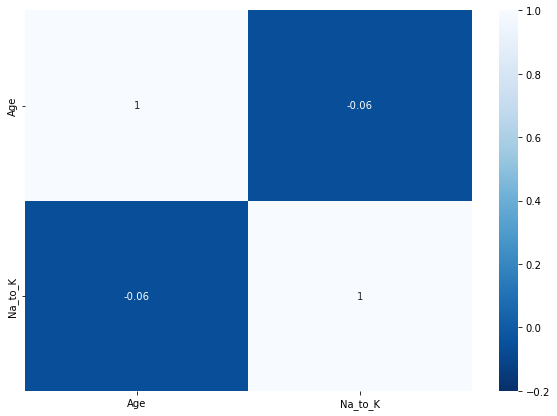

In [27]:
pearson =data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data = pearson, vmin=-0.2, vmax=1, cmap= 'Blues_r',annot=True, fmt=".1g")

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Split the dataset into training and testing sets
X = df.drop(['Drug'], axis=1)
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the drug types for the testing set
y_pred = rf.predict(X_test)


In [36]:
# Convert categorical variables into numerical labels
df=pd.get_dummies(data,columns=['Sex','BP','Cholesterol'])

In [37]:
# Calculate the AUC-ROC score and plot the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='drugY')
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Convert categorical variables into numerical labels
df['sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['BP'] = df['BP'].map({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
df['Cholesterol'] = df['Cholesterol'].map({'NORMAL': 0, 'HIGH': 1})

# Split the dataset into training and testing sets
X = df.drop(['Drug'], axis=1)
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the drug types for the testing set
y_pred = rf.predict(X_test)

# Calculate the AUC-ROC score and plot the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='drugY')
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

KeyError: 'Sex'

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='drugY')
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

NameError: name 'y_pred' is not defined

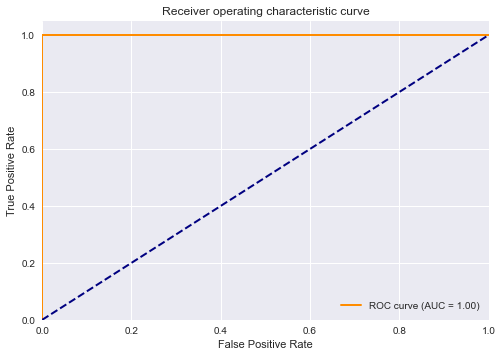

In [77]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv("data/drug200.csv")

# Split the data into features (X) and target (y)
X = df.drop(columns=["Drug"])
y = df["Drug"]

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = rf.predict_proba(X_test)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(pd.get_dummies(y_test).iloc[:,0], y_pred_proba[:,0])

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()